In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("csv_result-chronic_kidney_disease (1).csv")

In [57]:
df.head()

,id,'age','bp','sg','al','su','rbc','pc','pcc','ba',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,1,48,80,1.02,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.02,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.01,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.01,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [58]:
df.columns

Index(['id', ''age'', ''bp'', ''sg'', ''al'', ''su'', ''rbc'', ''pc'', ''pcc'',
       ''ba'', ''bgr'', ''bu'', ''sc'', ''sod'', ''pot'', ''hemo'', ''pcv'',
       ''wbcc'', ''rbcc'', ''htn'', ''dm'', ''cad'', ''appet'', ''pe'',
       ''ane'', ''class''],
      dtype='object')

In [59]:
# Remove extra quotes and spaces from column names
df.columns = df.columns.str.replace("'", "").str.strip()
print(df.columns)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [60]:
#droping the unwanted columns 

columns_to_drop = ['id','pcc', 'ba', 'pot', 'cad', 'appet', 'pe', 'Unnamed: 26']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df


,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,hemo,pcv,wbcc,rbcc,htn,dm,ane,class
0,48,80,1.02,1,0,?,normal,121,36,1.2,?,15.4,44,7800,5.2,yes,yes,no,ckd
1,7,50,1.02,4,0,?,normal,?,18,0.8,?,11.3,38,6000,?,no,no,no,ckd
2,62,80,1.01,2,3,normal,normal,423,53,1.8,?,9.6,31,7500,?,no,yes,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,117,56,3.8,111,11.2,32,6700,3.9,yes,no,yes,ckd
4,51,80,1.01,2,0,normal,normal,106,26,1.4,?,11.6,35,7300,4.6,no,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,140,49,0.5,150,15.7,47,6700,4.9,no,no,no,notckd
396,42,70,1.025,0,0,normal,normal,75,31,1.2,141,16.5,54,7800,6.2,no,no,no,notckd
397,12,80,1.02,0,0,normal,normal,100,26,0.6,137,15.8,49,6600,5.4,no,no,no,notckd
398,17,60,1.025,0,0,normal,normal,114,50,1,135,14.2,51,7200,5.9,no,no,no,notckd


handeling age column 

In [61]:
df['age'].isna().sum()
# Convert 'age' column to numeric (replacing '?' with NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Calculate the mean of 'age', ignoring NaN values
mean_age = df['age'].mean()
sge_mean = int(mean_age)
df['age'].fillna(sge_mean)
df['age'] = df['age'].fillna(51)
df ['age'] = df['age'].astype(int)

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    int64 
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   bgr     400 non-null    object
 8   bu      400 non-null    object
 9   sc      400 non-null    object
 10  sod     400 non-null    object
 11  hemo    400 non-null    object
 12  pcv     400 non-null    object
 13  wbcc    400 non-null    object
 14  rbcc    400 non-null    object
 15  htn     400 non-null    object
 16  dm      399 non-null    object
 17  ane     400 non-null    object
 18  class   400 non-null    object
dtypes: int64(1), object(18)
memory usage: 59.5+ KB


bp column

In [63]:
df['bp'] = pd.to_numeric(df['bp'], errors='coerce')
bp_mean = df['bp'].mean()
df['bp'].fillna(bp_mean, inplace=True)
df['bp'] = df['bp'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    object 
 3   al      400 non-null    object 
 4   su      400 non-null    object 
 5   rbc     400 non-null    object 
 6   pc      400 non-null    object 
 7   bgr     400 non-null    object 
 8   bu      400 non-null    object 
 9   sc      400 non-null    object 
 10  sod     400 non-null    object 
 11  hemo    400 non-null    object 
 12  pcv     400 non-null    object 
 13  wbcc    400 non-null    object 
 14  rbcc    400 non-null    object 
 15  htn     400 non-null    object 
 16  dm      399 non-null    object 
 17  ane     400 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(1), int64(1), object(17)
memory usage: 59.5+ KB


C:\Users\aabit\AppData\Local\Temp\ipykernel_24444\703536981.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bp'].fillna(bp_mean, inplace=True)


replacing ? with nan to make work easy


In [64]:
df.replace('?', pd.NA, inplace=True)


changing all the numeric columns into numeric value  

In [65]:


import pandas as pd

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Convert numeric columns to proper data types
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')  # Converts numbers while keeping text columns unchanged

# Handle NaN values - Example: Fill with mean (only for numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)

# Verify changes
print(df.isnull().sum())  # Check how many NaN values remain


age        0
bp         0
sg         0
al         0
su         0
rbc      152
pc        65
bgr        0
bu         0
sc         0
sod        0
hemo       0
pcv        0
wbcc       0
rbcc       0
htn        2
dm         3
ane        1
class      0
dtype: int64


C:\Users\aabit\AppData\Local\Temp\ipykernel_24444\203930499.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')  # Converts numbers while keeping text columns unchanged


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     398 non-null    object 
 16  dm      397 non-null    object 
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(12), int64(1), object(6)
memory usage: 59.5+ KB


changin the data type of su

In [67]:
df['su'] = df['su'].astype(int)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     398 non-null    object 
 16  dm      397 non-null    object 
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(11), int64(2), object(6)
memory usage: 59.5+ KB


woking with the rbc column 

In [69]:
df['rbc'].fillna('normal', inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['rbc'] = le.fit_transform(df['rbc'])
df['rbc'] = df['rbc'].astype(int)


C:\Users\aabit\AppData\Local\Temp\ipykernel_24444\3450836262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rbc'].fillna('normal', inplace=True)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      335 non-null    object 
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     398 non-null    object 
 16  dm      397 non-null    object 
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(11), int64(3), object(5)
memory usage: 59.5+ KB


working with the pc column

In [71]:
df['pc'].fillna(df['pc'].mode(), inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['pc'] = le.fit_transform(df['pc'])
df['pc'] = df['pc'].astype(int)


C:\Users\aabit\AppData\Local\Temp\ipykernel_24444\4086272579.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pc'].fillna(df['pc'].mode(), inplace=True)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     398 non-null    object 
 16  dm      397 non-null    object 
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(11), int64(4), object(4)
memory usage: 59.5+ KB


In [73]:
df

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,hemo,pcv,wbcc,rbcc,htn,dm,ane,class
0,48,80.0,1.020,1.0,0,1,1,121.000000,36.0,1.2,137.528754,15.4,44.0,7800.0,5.200000,yes,yes,no,ckd
1,7,50.0,1.020,4.0,0,1,1,148.036517,18.0,0.8,137.528754,11.3,38.0,6000.0,4.707435,no,no,no,ckd
2,62,80.0,1.010,2.0,3,1,1,423.000000,53.0,1.8,137.528754,9.6,31.0,7500.0,4.707435,no,yes,yes,ckd
3,48,70.0,1.005,4.0,0,1,0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.900000,yes,no,yes,ckd
4,51,80.0,1.010,2.0,0,1,1,106.000000,26.0,1.4,137.528754,11.6,35.0,7300.0,4.600000,no,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0,1,1,140.000000,49.0,0.5,150.000000,15.7,47.0,6700.0,4.900000,no,no,no,notckd
396,42,70.0,1.025,0.0,0,1,1,75.000000,31.0,1.2,141.000000,16.5,54.0,7800.0,6.200000,no,no,no,notckd
397,12,80.0,1.020,0.0,0,1,1,100.000000,26.0,0.6,137.000000,15.8,49.0,6600.0,5.400000,no,no,no,notckd
398,17,60.0,1.025,0.0,0,1,1,114.000000,50.0,1.0,135.000000,14.2,51.0,7200.0,5.900000,no,no,no,notckd


working with the htn

In [74]:
df['htn'].isna().sum()
df['htn'].mode()
df['htn'] = df['htn'].fillna('no')
df['htn'].isna().sum()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['htn'] = le.fit_transform(df['htn'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     400 non-null    int64  
 16  dm      397 non-null    object 
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(11), int64(5), object(3)
memory usage: 59.5+ KB


working with the dm

In [75]:
df['dm'].isna().sum()
df['dm'].mode()
df['dm'] = df['dm'].fillna('no')
df['dm'].isna().sum()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['dm'] = le.fit_transform(df['dm'])
df['dm'] = df['dm'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     400 non-null    int64  
 16  dm      400 non-null    int64  
 17  ane     399 non-null    object 
 18  class   400 non-null    object 
dtypes: float64(11), int64(6), object(2)
memory usage: 59.5+ KB


working with the ane 

In [76]:
df['ane'].isnull().sum()
df['ane'] = df['ane'].fillna('yes')
df['ane'] = le.fit_transform(df['ane'])
df['ane'] = df['ane'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     400 non-null    int64  
 16  dm      400 non-null    int64  
 17  ane     400 non-null    int64  
 18  class   400 non-null    object 
dtypes: float64(11), int64(7), object(1)
memory usage: 59.5+ KB


working with the last and y column (target)

In [77]:
df['class'] = le.fit_transform(df['class'])
df['class'] = df['class'].astype(int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    int64  
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    int64  
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   bgr     400 non-null    float64
 8   bu      400 non-null    float64
 9   sc      400 non-null    float64
 10  sod     400 non-null    float64
 11  hemo    400 non-null    float64
 12  pcv     400 non-null    float64
 13  wbcc    400 non-null    float64
 14  rbcc    400 non-null    float64
 15  htn     400 non-null    int64  
 16  dm      400 non-null    int64  
 17  ane     400 non-null    int64  
 18  class   400 non-null    int64  
dtypes: float64(11), int64(8)
memory usage: 59.5 KB


end of data processing and data cleaning 

start of visualizstion 

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age', ylabel='class'>

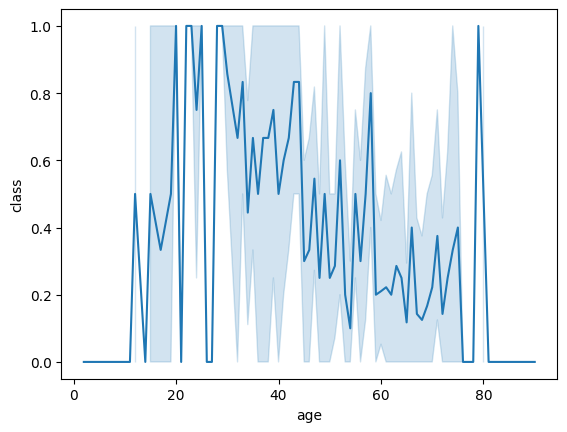

In [80]:
sns.lineplot(x = df['age'], y=df['class'])

In [81]:
df.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'bgr', 'bu', 'sc', 'sod',
       'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'ane', 'class'],
      dtype='object')

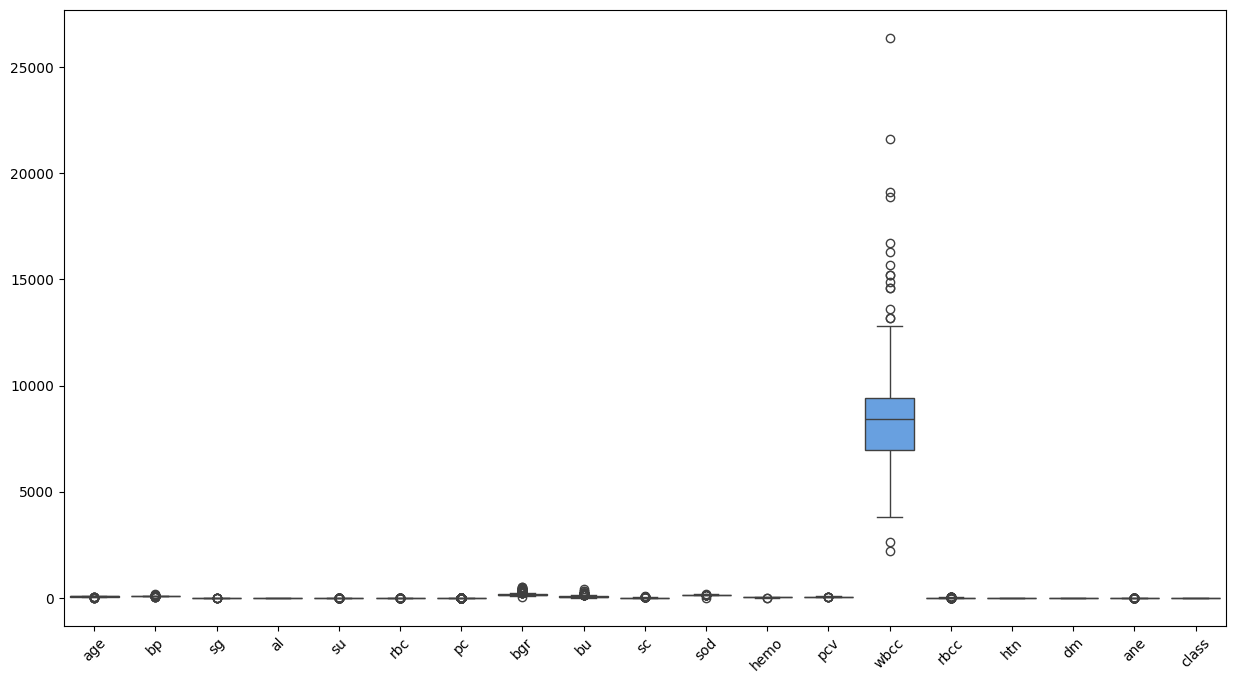

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df 

# Set figure size
plt.figure(figsize=(15, 8))

# Create multiple box plots for numerical columns
sns.boxplot(data=df)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()


feature engineering

In [83]:
#feature engineering


x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [84]:
x

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,hemo,pcv,wbcc,rbcc,htn,dm,ane
0,48,80.0,1.020,1.0,0,1,1,121.000000,36.0,1.2,137.528754,15.4,44.0,7800.0,5.200000,1,1,0
1,7,50.0,1.020,4.0,0,1,1,148.036517,18.0,0.8,137.528754,11.3,38.0,6000.0,4.707435,0,0,0
2,62,80.0,1.010,2.0,3,1,1,423.000000,53.0,1.8,137.528754,9.6,31.0,7500.0,4.707435,0,1,1
3,48,70.0,1.005,4.0,0,1,0,117.000000,56.0,3.8,111.000000,11.2,32.0,6700.0,3.900000,1,0,1
4,51,80.0,1.010,2.0,0,1,1,106.000000,26.0,1.4,137.528754,11.6,35.0,7300.0,4.600000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80.0,1.020,0.0,0,1,1,140.000000,49.0,0.5,150.000000,15.7,47.0,6700.0,4.900000,0,0,0
396,42,70.0,1.025,0.0,0,1,1,75.000000,31.0,1.2,141.000000,16.5,54.0,7800.0,6.200000,0,0,0
397,12,80.0,1.020,0.0,0,1,1,100.000000,26.0,0.6,137.000000,15.8,49.0,6600.0,5.400000,0,0,0
398,17,60.0,1.025,0.0,0,1,1,114.000000,50.0,1.0,135.000000,14.2,51.0,7200.0,5.900000,0,0,0


In [85]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [87]:
x_train

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,hemo,pcv,wbcc,rbcc,htn,dm,ane
247,54,90.0,1.025000,1.000000,0,1,0,150.0,18.0,1.2,140.0,12.526437,38.884498,8406.122449,4.707435,0,0,1
110,63,90.0,1.015000,0.000000,0,1,1,123.0,19.0,2.0,142.0,11.700000,34.000000,11400.000000,4.700000,0,0,0
16,47,70.0,1.015000,2.000000,0,1,1,99.0,46.0,2.2,138.0,12.600000,38.884498,8406.122449,4.707435,0,0,0
66,67,70.0,1.020000,2.000000,0,0,1,150.0,55.0,1.6,131.0,12.526437,38.884498,8406.122449,4.707435,1,1,0
153,55,90.0,1.010000,2.000000,1,0,0,273.0,235.0,14.2,132.0,8.300000,22.000000,14600.000000,2.900000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,46,60.0,1.010000,1.000000,0,1,1,163.0,92.0,3.3,141.0,9.800000,28.000000,14600.000000,3.200000,1,1,0
106,50,90.0,1.017408,1.016949,0,1,2,89.0,118.0,6.1,127.0,6.000000,17.000000,6500.000000,4.707435,1,1,1
270,23,80.0,1.025000,0.000000,0,1,1,111.0,34.0,1.1,145.0,14.300000,41.000000,7200.000000,5.000000,0,0,0
348,38,80.0,1.020000,0.000000,0,1,1,99.0,19.0,0.5,147.0,13.600000,44.000000,7300.000000,6.400000,0,0,0


In [88]:
x_test

,age,bp,sg,al,su,rbc,pc,bgr,bu,sc,sod,hemo,pcv,wbcc,rbcc,htn,dm,ane
209,19,70.000000,1.020000,0.000000,0,1,1,148.036517,57.425722,3.072454,137.528754,11.5,38.884498,6900.000000,4.707435,0,0,0
280,47,80.000000,1.017408,1.016949,0,1,2,93.000000,33.000000,0.900000,144.000000,13.3,52.000000,8100.000000,5.200000,0,0,0
33,60,100.000000,1.020000,2.000000,0,0,0,140.000000,55.000000,2.500000,137.528754,10.1,29.000000,8406.122449,4.707435,1,0,0
210,59,100.000000,1.015000,4.000000,2,1,1,255.000000,132.000000,12.800000,135.000000,7.3,20.000000,9800.000000,3.900000,1,1,1
93,73,100.000000,1.010000,3.000000,2,0,0,295.000000,90.000000,5.600000,140.000000,9.2,30.000000,7000.000000,3.200000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,39,70.000000,1.025000,0.000000,0,1,1,131.000000,46.000000,0.600000,145.000000,15.6,41.000000,9400.000000,4.700000,0,0,0
373,61,70.000000,1.025000,0.000000,0,1,1,133.000000,38.000000,1.000000,142.000000,13.7,47.000000,9200.000000,4.900000,0,0,0
380,59,60.000000,1.020000,0.000000,0,1,1,113.000000,23.000000,1.100000,139.000000,15.3,54.000000,6500.000000,4.900000,0,0,0
239,34,90.000000,1.015000,2.000000,0,1,1,104.000000,50.000000,1.600000,137.000000,11.9,39.000000,8406.122449,4.707435,0,0,0


In [89]:
y_train

247    0
110    0
16     0
66     0
153    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: class, Length: 300, dtype: int64

In [90]:
y_test

209    0
280    1
33     0
210    0
93     0
      ..
314    1
373    1
380    1
239    0
75     0
Name: class, Length: 100, dtype: int64

In [91]:
#standardization

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

support vector machine(classification)

In [92]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train,y_train)
y_pred =svc.predict(x_test)

metrix 

In [93]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
score

0.65

report

In [94]:
classification_report(y_test, y_pred)

C:\Users\aabit\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aabit\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aabit\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

'              precision    recall  f1-score   support\n\n           0       0.65      1.00      0.79        65\n           1       0.00      0.00      0.00        35\n\n    accuracy                           0.65       100\n   macro avg       0.33      0.50      0.39       100\nweighted avg       0.42      0.65      0.51       100\n'

Random forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions
y_pred_d = rf.predict(x_test)


In [96]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred_d)
print(score)
print(classification_report(y_test, y_pred_d))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        35

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



logistic regressiion 

In [97]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(x_train, y_train)

# Make predictions
y_pred_l = log_reg.predict(x_test)


C:\Users\aabit\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred_l)
print(score)
print(classification_report(y_test, y_pred_l))

0.92
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        65
           1       0.86      0.91      0.89        35

    accuracy                           0.92       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.92      0.92       100



In [99]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model with the desired number of neighbors (default is 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
y_pred_k = knn.predict(x_test)


In [100]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred_k)
print(score)
print(classification_report(y_test, y_pred_k))

0.73
              precision    recall  f1-score   support

           0       0.91      0.65      0.76        65
           1       0.57      0.89      0.70        35

    accuracy                           0.73       100
   macro avg       0.74      0.77      0.73       100
weighted avg       0.79      0.73      0.74       100



Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
decision_forest = DecisionTreeClassifier()

# Train the model
decision_forest.fit(x_train, y_train)

# Make predictions
y_pred_d = decision_forest.predict(x_test)


In [102]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred_d)
print(score)
print(classification_report(y_test, y_pred_d))

0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       0.97      1.00      0.99        35

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



pickel dumb model 


In [106]:
import pickle

# Example: Save a trained model
with open('models/model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)


In [108]:
import pickle

# Example: Save a trained model
with open('models/scale.pkl', 'wb') as file:
    pickle.dump(scale, file)